<a href="https://colab.research.google.com/github/Agil0509/Deep-Learning/blob/main/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [2]:
len(X_train)

50000

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

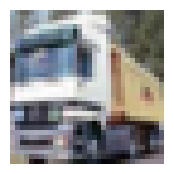

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (2,2))
plt.imshow(X_train[1])
plt.axis('off');

In [6]:
class_namees = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships','trucks']

In [7]:
import os
from PIL import Image
import numpy as np

def create_directory(images, labels, base_dir):
    os.makedirs(base_dir, exist_ok=True)  # Create the base directory if it doesn't exist

    for i, (img, label) in enumerate(zip(images, labels)):
        # Create a directory for the label if it doesn't exist
        class_dir = os.path.join(base_dir, str(label))  # Convert label to string if it's an integer
        os.makedirs(class_dir, exist_ok=True)

        # Save the image to the class directory
        img_path = os.path.join(class_dir, f"image_{i}.png")
        img = (img * 255).astype(np.uint8)  # Scale to [0, 255] if normalized
        Image.fromarray(img).save(img_path)

train_dir = "train_directory"
test_dir = "test_directory"

create_directory(X_train, y_train, train_dir)
create_directory(X_test, y_test, test_dir)


In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (227,227),
    class_mode = 'categorical',
    batch_size = 32,
    seed = 42,
    shuffle=True,
)

test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (227,227),
    class_mode = 'categorical',
    batch_size = 32,
    seed = 42,
    shuffle=True,
)

Found 50000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


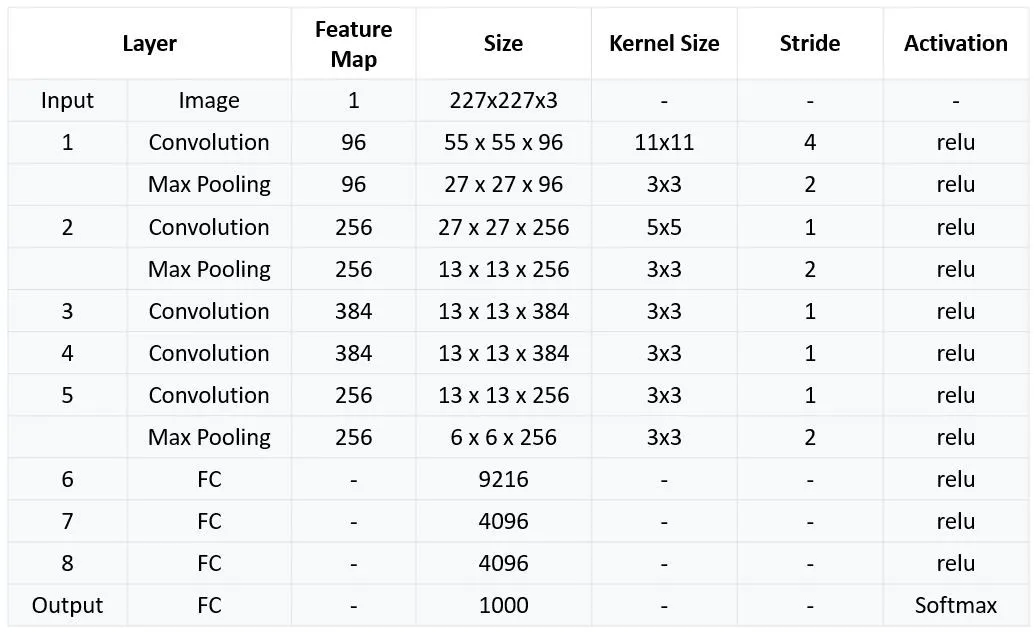

In [9]:
def AlexNet(input_shape,num_classes):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape = input_shape))

  #Conv1
  model.add(tf.keras.layers.Conv2D(96,kernel_size=11,strides = 4,padding = 'valid',activation = 'relu',kernel_initializer='he_normal'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = 2,padding = 'valid'))

  #Conv2
  model.add(tf.keras.layers.Conv2D(256,kernel_size=5,strides = 1,padding = 'same',activation = 'relu',kernel_initializer='he_normal'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = 2,padding = 'valid'))

  #Conv3
  model.add(tf.keras.layers.Conv2D(384,kernel_size=3,strides = 1,padding = 'same',activation = 'relu',kernel_initializer='he_normal'))

  #Conv4
  model.add(tf.keras.layers.Conv2D(384,kernel_size=3,strides = 1,padding = 'same',activation = 'relu',kernel_initializer='he_normal'))

  #Conv5
  model.add(tf.keras.layers.Conv2D(256,kernel_size=3,strides = 3,padding = 'same',activation = 'relu',kernel_initializer='he_normal'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides = (2,2),padding = 'valid'))

  #Flatten layer
  model.add(tf.keras.layers.Flatten())

  #Fully connected layers
  model.add(tf.keras.layers.Dense(9216,activation = 'relu'))
  model.add(tf.keras.layers.Dense(4096,activation = 'relu'))
  model.add(tf.keras.layers.Dense(4096,activation = 'relu'))

  #Output layer
  model.add(tf.keras.layers.Dense(num_classes,activation = 'softmax'))

  #compile the model
  model.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ['accuracy'])

  return model

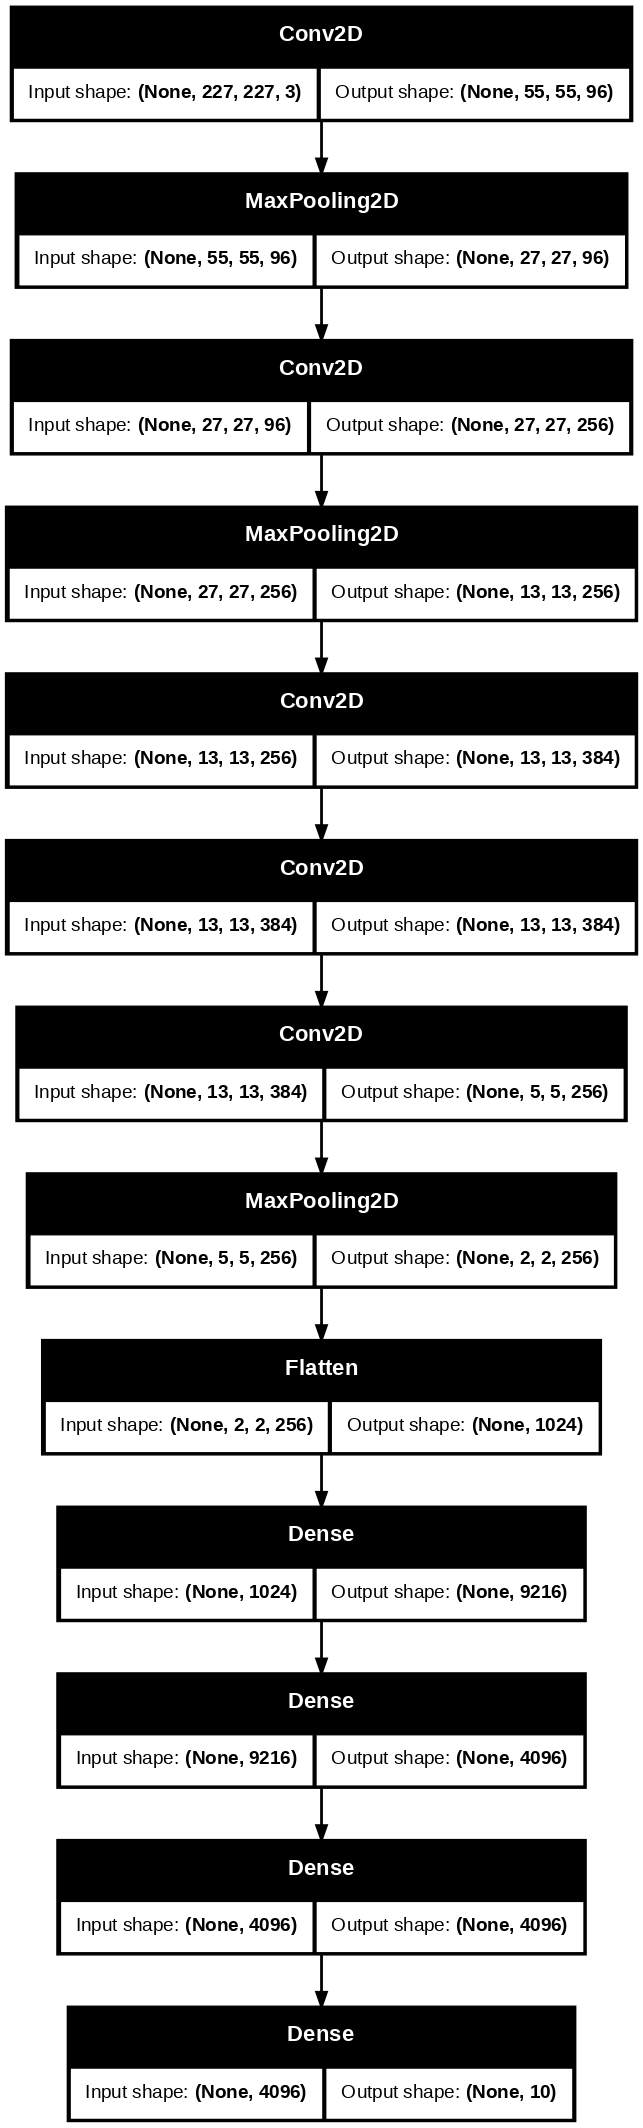

In [12]:
model = AlexNet((227,227,3),10)

tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

In [ ]:
model = AlexNet((227,227,3),10)
history = model.fit(train_data, epochs = 10,
                    validation_data = test_data)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 592s 374ms/step - accuracy: 0.1841 - loss: 2.5041 - val_accuracy: 0.3417 - val_loss: 1.7750
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 573s 365ms/step - accuracy: 0.3439 - loss: 1.7490 - val_accuracy: 0.4404 - val_loss: 1.5214
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 624s 366ms/step - accuracy: 0.4297 - loss: 1.5492 - val_accuracy: 0.4885 - val_loss: 1.3979
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 573s 365ms/step - accuracy: 0.4936 - loss: 1.4000 - val_accuracy: 0.5376 - val_loss: 1.2795
Epoch 5/10
 997/1563 ━━━━━━━━━━━━━━━━━━━━ 3:23 360ms/step - accuracy: 0.5254 - loss: 1.3114